In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets
from keras.models import Sequential
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from models import *

In [3]:
def to_grayscale(imgs): #Grayscale images with 3 bands
    gray_imgs = []
    for im in imgs:
        if imgs.ndim == 3:
            im = imgs
        img = Image.fromarray(im.astype('uint8'))
        img = img.convert(mode='L')
        img_arr = np.asarray(img)
        img_arr = img_arr.reshape(img_arr.shape[0], img_arr.shape[1], 1)
        orig_arr = img_arr.copy()
        for i in range(2):
            img_arr = np.append(img_arr, orig_arr, axis=2)
        if imgs.ndim == 3:
            return img_arr
        gray_imgs.append(img_arr)
    return np.array(gray_imgs)

In [4]:
# Keras dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
# Make the validation data
x_val, y_val = x_test[: 5000], y_test[: 5000]
x_test, y_test = x_test[5000 :], y_test[5000 :]

In [6]:
# My small dataset
data = []
for i in range(1, 9):
    img = Image.open(r'myimages\{}.jpg'.format(i))
    img = img.resize((350, 300))
    arr = np.asarray(img)
    data.append(arr.astype('float32'))
data = np.asarray(data)

## Turn the images to grayscale

In [7]:
grayx_train = to_grayscale(x_train)
grayx_val = to_grayscale(x_val)
grayx_test = to_grayscale(x_test)
gray_data = to_grayscale(data)

## Define the model's structure

In [23]:
# Create the models
autoencoder_funcs = [model1, model2, model3]
colorizer_funcs = [model1, model4, model5]
autoencoders = []
colorizers = []
for func in autoencoder_funcs:
    model = Sequential()
    model = func(model)
    autoencoders.append(model)
for func in colorizer_funcs:
    model = Sequential()
    model = func(model)
    colorizers.append(model)

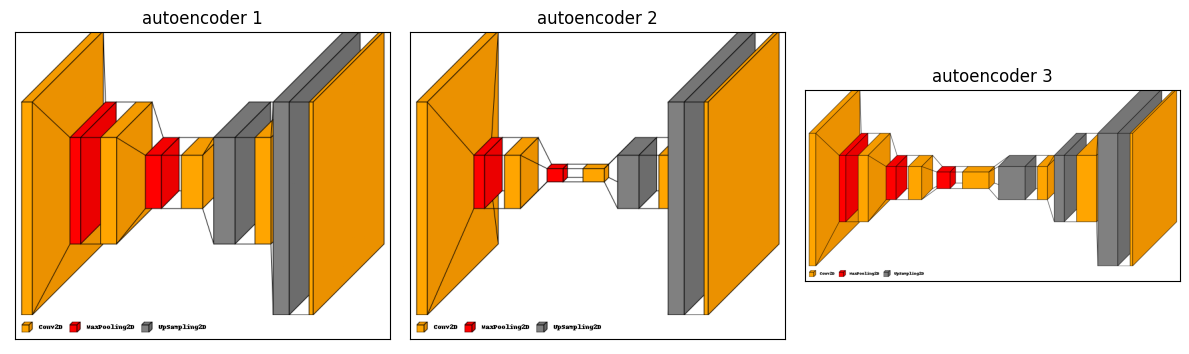

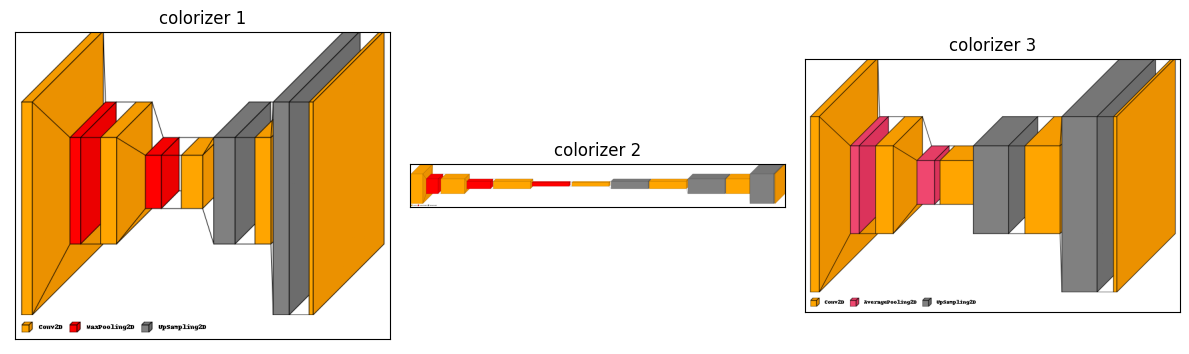

In [110]:
# Visualize the models' structure
ws = ['autoencoder', 'colorizer']
for w in ws:
    fig, axs = plt.subplots(1, 3, figsize=(12, 12), tight_layout=True)
    cols = axs.shape[0]
    ind = 1
    for c in range(cols):
        arr = np.asarray(Image.open(r'modelstructure\{}{}_struc.png'.format(w, ind)))
        axs[c].imshow(arr.astype('float32')/255)
        axs[c].set_xticks([])
        axs[c].set_yticks([])
        axs[c].set_title('{} {}'.format(w, ind))
        ind += 1
#plt.savefig('Models structures') # Save the figure
plt.show()

## Load the weights for each model

In [37]:
for ind, autoencoder in enumerate(autoencoders, 1):
    autoencoder.predict(x_train[:1].astype('float32')) # Forward pass so the weigths can be loaded
    autoencoder.load_weights(r'models weights\autoencoder{}.h5'.format(ind))
for ind, colorizer in enumerate(colorizers, 1):
    colorizer.predict(x_train[:1].astype('float32')) # Forward pass so the weigths can be loaded
    colorizer.load_weights(r'models weights\colorizer{}.h5'.format(ind))

1/1 [==============================] - 0s 172ms/step


## Plot the results

1/1 [==============================] - 0s 16ms/step


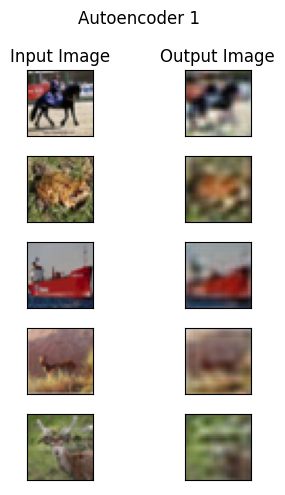

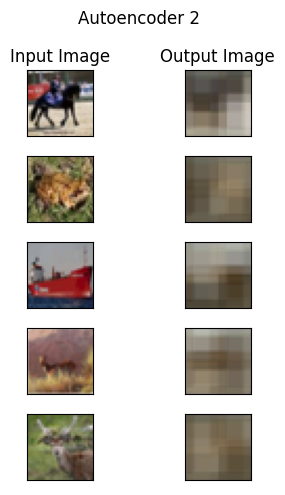

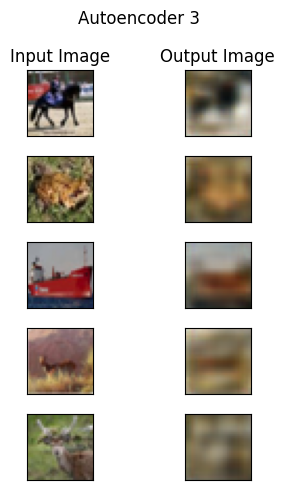

In [48]:
# Using the test dataset
# Autoencoders
for ind, autoencoder in enumerate(autoencoders, 1):
    fig1, axs = plt.subplots(5, 2, figsize=(4, 5), tight_layout=True)
    fig1.suptitle('Autoencoder {}'.format(ind))
    rows = axs.shape[0]
    cols = axs.shape[1]
    ind = 0
    for r in range(rows):
        for c in range(cols):
            if c == 0:
                inp =(x_test[ind])
                axs[r, c].imshow(inp/255)
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 0:
                    axs[r, c].set_title('Input Image', size='large')
            elif c == 1:
                pred = autoencoder.predict(np.reshape(inp/255, (1, inp.shape[0], inp.shape[1], 3)).astype('float32'))
                axs[r, c].imshow(pred[0])
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 1:
                    axs[r, c].set_title('Output Image', size='large')
        ind += 1
#plt.savefig('autoencoders_test_outputs') # Save the figure
plt.show()

1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 16ms/step


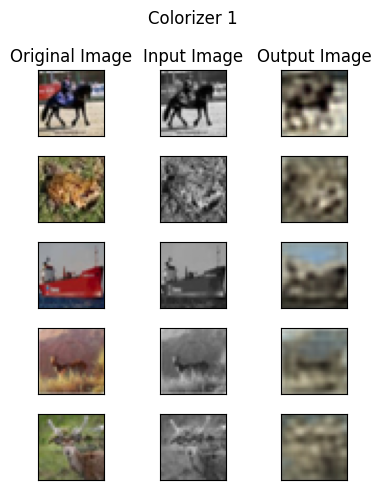

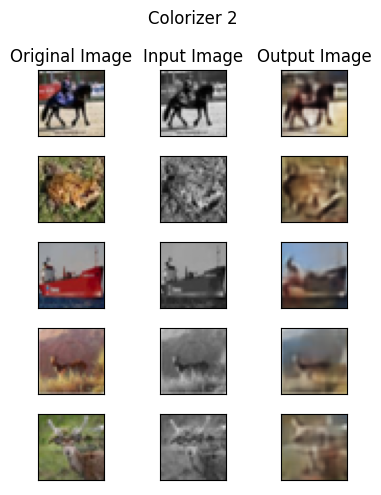

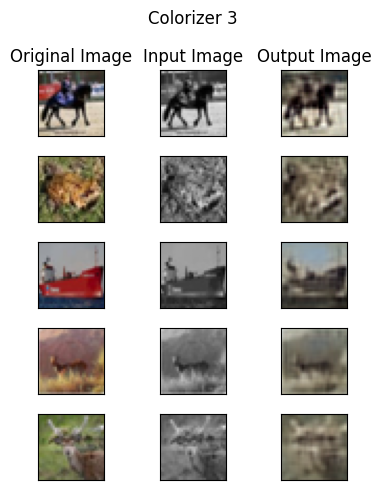

In [50]:
# Using the test dataset
# Colorizers
for ind, colorizer in enumerate(colorizers, 1):
    fig2, axs = plt.subplots(5, 3, figsize=(4, 5), tight_layout=True)
    fig2.suptitle('Colorizer {}'.format(ind))
    rows = axs.shape[0]
    cols = axs.shape[1]
    ind = 0
    for r in range(rows):
        for c in range(cols):
            if c == 0:
                img =(x_test[ind])
                axs[r, c].imshow(img/255)
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 0:
                    axs[r, c].set_title('Original Image', size='large')
            elif c == 1:
                inp =(grayx_test[ind])
                axs[r, c].imshow(inp/255)
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 1:
                    axs[r, c].set_title('Input Image', size='large')
            else:
                pred = colorizer.predict(np.reshape(inp/255, (1, inp.shape[0], inp.shape[1], 3)).astype('float32'))
                axs[r, c].imshow(pred[0])
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 2:
                    axs[r, c].set_title('Output Image', size='large')
        ind += 1
#plt.savefig('colorizers_test_outputs') # Save the figure
plt.show()

1/1 [==============================] - 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 41ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 51ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 40ms/step


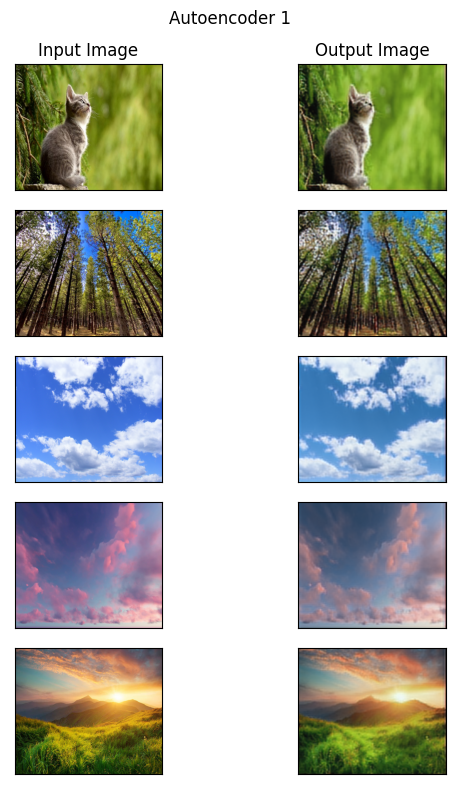

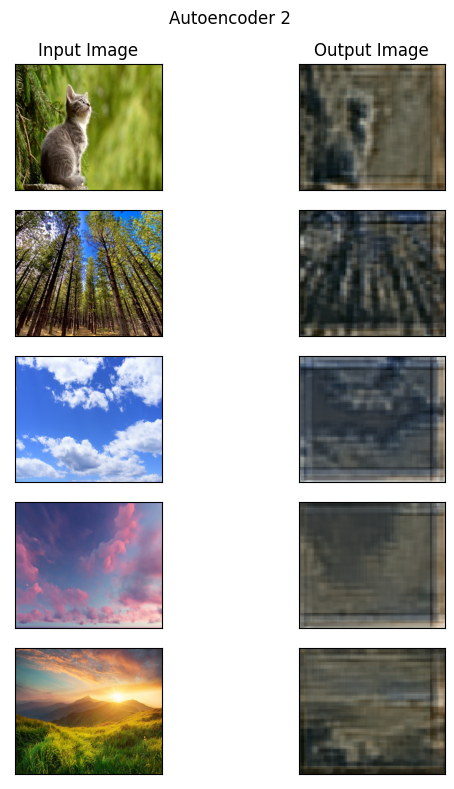

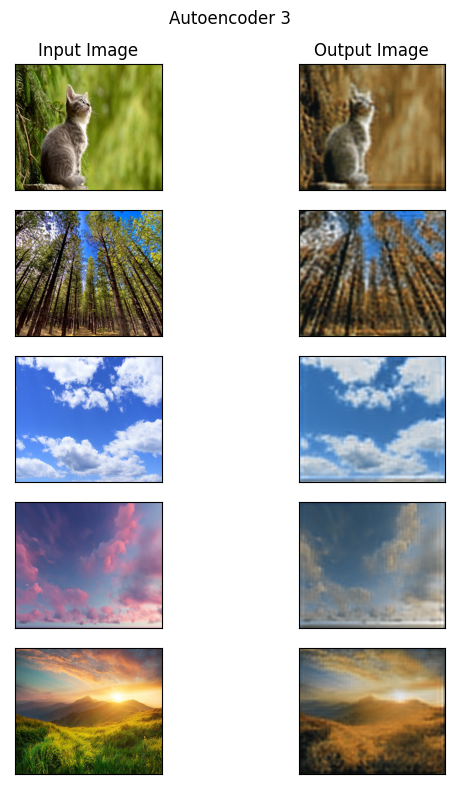

In [52]:
# Using my images
# Autoencoders
for ind, autoencoder in enumerate(autoencoders, 1):
    fig1, axs = plt.subplots(5, 2, figsize=(7, 8), tight_layout=True)
    fig1.suptitle('Autoencoder {}'.format(ind))
    rows = axs.shape[0]
    cols = axs.shape[1]
    ind = 0
    for r in range(rows):
        for c in range(cols):
            if c == 0:
                inp =(data[ind])
                axs[r, c].imshow(inp/255)
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 0:
                    axs[r, c].set_title('Input Image', size='large')
            elif c == 1:
                pred = autoencoder.predict(np.reshape(inp/255, (1, inp.shape[0], inp.shape[1], 3)).astype('float32'))
                axs[r, c].imshow(pred[0])
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 1:
                    axs[r, c].set_title('Output Image', size='large')
        ind += 1
#plt.savefig('autoencoders_myimages_outputs') # Save the figure
plt.show()

1/1 [==============================] - 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 42ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 59ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 50ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 48ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 44ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


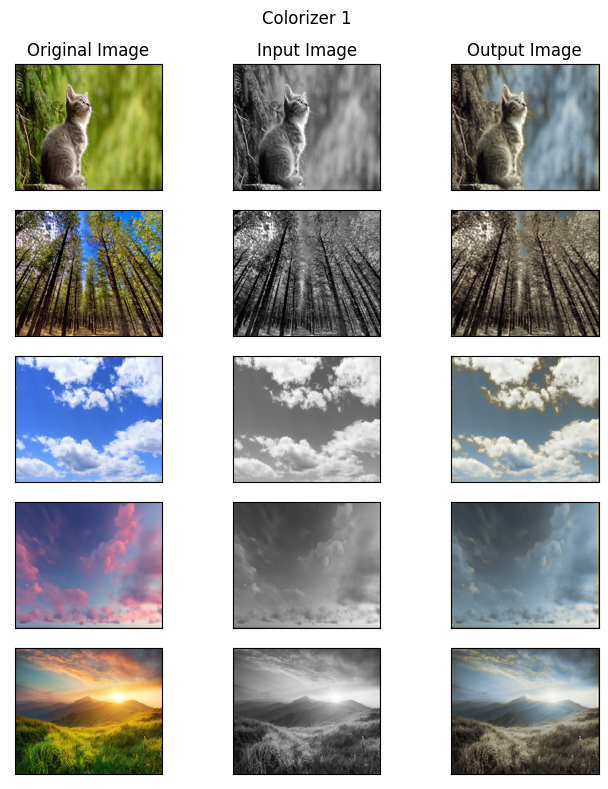

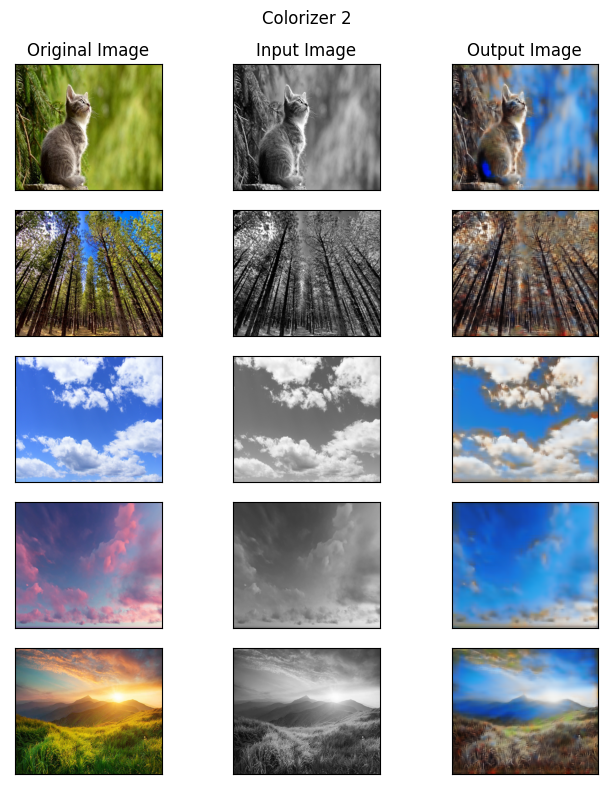

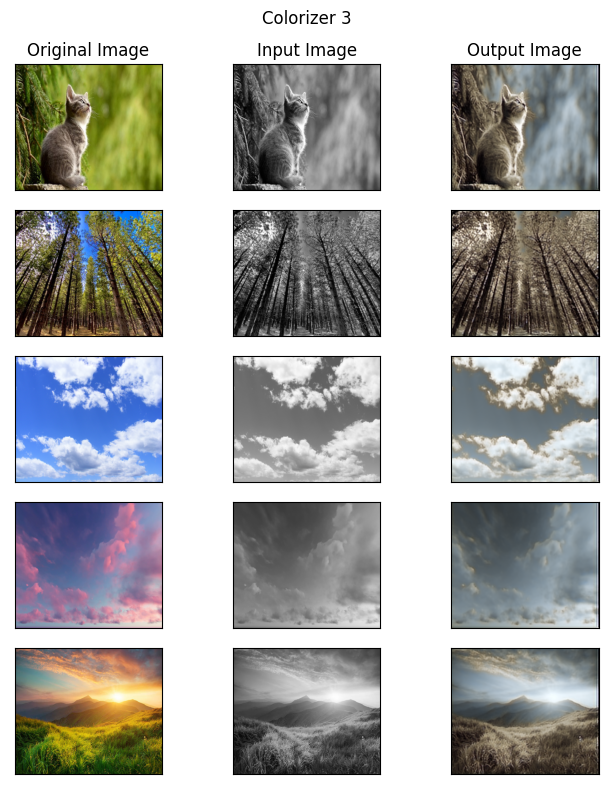

In [54]:
# Using my images
# Colorizers
for ind, colorizer in enumerate(colorizers, 1):
    fig2, axs = plt.subplots(5, 3, figsize=(7, 8), tight_layout=True)
    fig2.suptitle('Colorizer {}'.format(ind))
    rows = axs.shape[0]
    cols = axs.shape[1]
    ind = 0
    for r in range(rows):
        for c in range(cols):
            if c == 0:
                img =(data[ind])
                axs[r, c].imshow(img/255)
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 0:
                    axs[r, c].set_title('Original Image', size='large')
            elif c == 1:
                inp =(gray_data[ind])
                axs[r, c].imshow(inp/255)
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 1:
                    axs[r, c].set_title('Input Image', size='large')
            else:
                pred = colorizer.predict(np.reshape(inp/255, (1, inp.shape[0], inp.shape[1], 3)).astype('float32'))
                axs[r, c].imshow(pred[0])
                axs[r, c].set_xticks([])
                axs[r, c].set_yticks([])
                if r + c == 2:
                    axs[r, c].set_title('Output Image', size='large')
        ind += 1
#plt.savefig('colorizers_myimages_outputs') # Save the figure
plt.show()

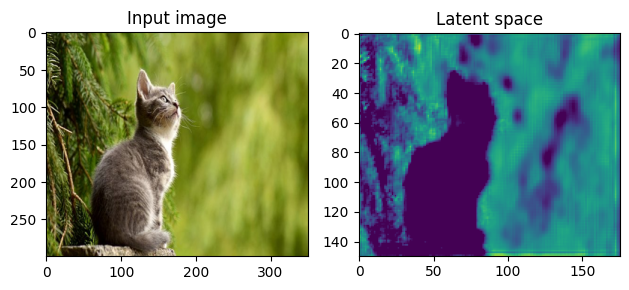

In [85]:
# Show the image in Latent Space for a given channel
fig, axs = plt.subplots(1, 2, tight_layout=True)
for c in range(2):
    if c == 0:
        axs[c].imshow(data[0]/255)
        axs[c].set_title('Input image')
    else:
        # Select a layer to view its output
        layer = 6 # Select 6 for autoencoder 3 and colorizer 2. Select 4 for the rest
        channel = 5 # First channel of the layer
        intermediate_layer_model = keras.Model(inputs=autoencoders[0].input,
                                       outputs=autoencoders[0].layers[layer].output)
        intermediate_output = intermediate_layer_model(data)
        axs[c].imshow(np.asarray(intermediate_output)[0, :, :, channel])       
        axs[c].set_title('Latent space')
#plt.savefig('latent_space') # Save the figure
plt.show()

## Evaluate the model on the test data

In [86]:
# Evaluate the autoencoders
for autoencoder in autoencoders:
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    autoencoder.evaluate(x_test.astype('float32')/255, x_test.astype('float32')/255, batch_size=128)

40/40 [==============================] - 2s 44ms/step - loss: 0.5818 - acc: 0.6127


In [87]:
# Evaluate the colorizers
for colorizer in colorizers:
    colorizer.compile(optimizer='adam', loss='mse', metrics=['acc'])
    colorizer.evaluate(grayx_test.astype('float32')/255, x_test.astype('float32')/255, batch_size=128)

40/40 [==============================] - 2s 48ms/step - loss: 0.0072 - acc: 0.4885


## Plot the accuracy and loss of each model for train and val sets

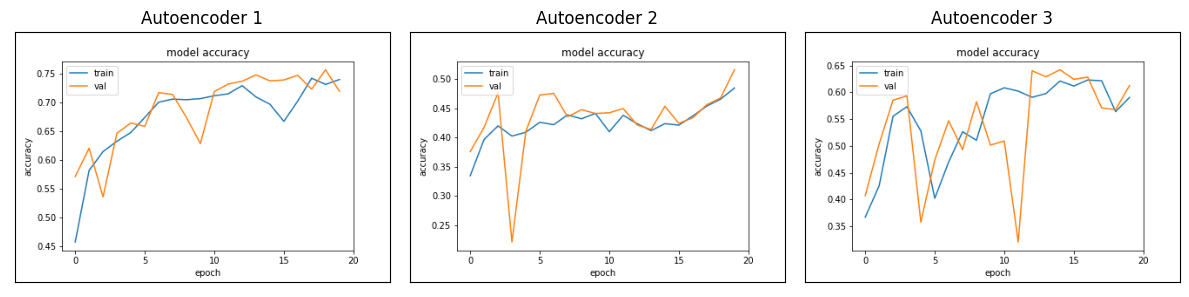

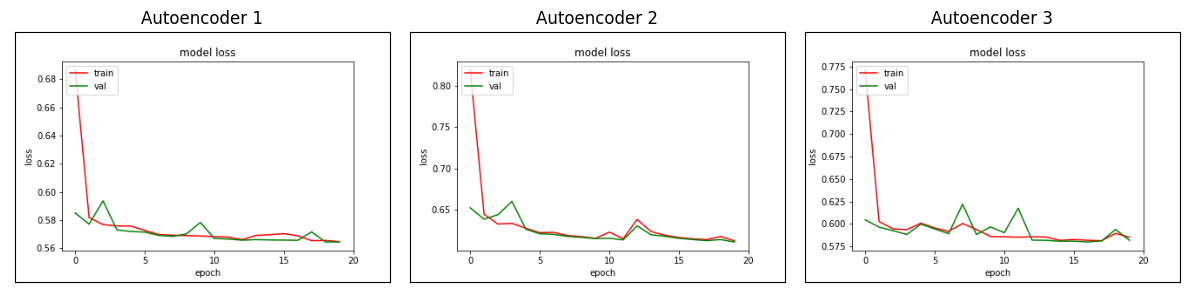

In [105]:
# Autoencoders
ws = ['acc', 'loss']
for w in ws:
    fig, axs = plt.subplots(1, 3, figsize=(12, 12), tight_layout=True)
    cols = axs.shape[0]
    ind = 1
    for c in range(cols):
        arr = np.asarray(Image.open(r'acc_loss\auto{}_{}.png'.format(ind, w)))
        axs[c].imshow(arr.astype('float32')/255)
        axs[c].set_xticks([])
        axs[c].set_yticks([])
        axs[c].set_title('Autoencoder {}'.format(ind))
        ind += 1
    #plt.savefig('Autoencoders metrics') # Save the figure
    plt.show()

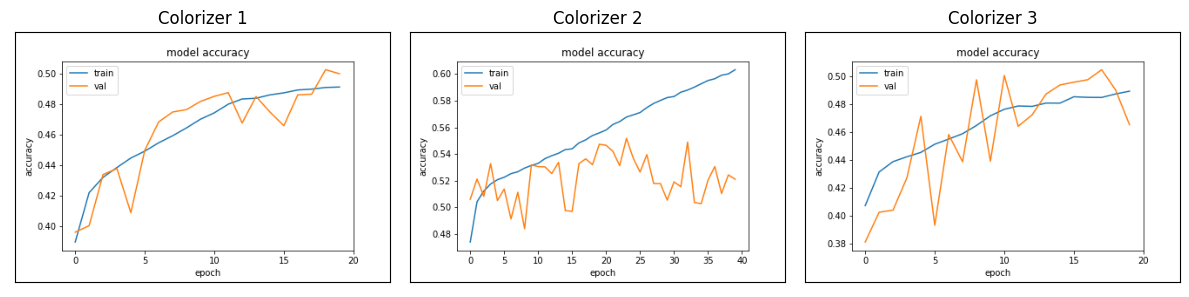

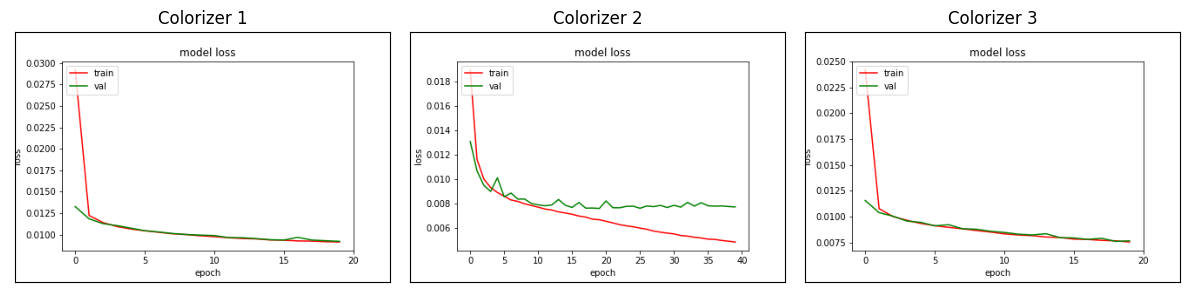

In [106]:
# Colorizers
ws = ['acc', 'loss']
for w in ws:
    fig, axs = plt.subplots(1, 3, figsize=(12, 12), tight_layout=True)
    cols = axs.shape[0]
    ind = 1
    for c in range(cols):
        arr = np.asarray(Image.open(r'acc_loss\col{}_{}.png'.format(ind, w)))
        axs[c].imshow(arr.astype('float32')/255)
        axs[c].set_xticks([])
        axs[c].set_yticks([])
        axs[c].set_title('Colorizer {}'.format(ind))
        ind += 1
#plt.savefig('Colorizers metrics') # Save the figure
plt.show()

### Given the above plots the autoencoder with the best performance is the first model with accuracy more than 70%. This is because, the latent space is larger in the first autoencoder than the other two created models since they compress more the input image. So there exist a correlation between the latent space size and the accuracy of the autoencoder.

### On the other hand, the colorizer with the greatest accuracy appears to be the second one, since more filters are used and hence more weights are introduced to the model.

## Summary of the models

In [109]:
# Autoencoders
for ind, autoencoder in enumerate(autoencoders, 1):
    print ('Autoencoder {}\n'.format(ind))
    autoencoder.summary()

# Colorizers
for ind, colorizer in enumerate(colorizers, 1):
    print ('Colorizer {}\n'.format(ind))
    colorizer.summary()

Autoencoder 1

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, None, None, 8)     224       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, None, None, 8)    0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, None, None, 12)    876       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, None, None, 12)   0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, None, None, 16)    1744      
                                                                 
 up_sampling2d_25 (UpSamplin  (None, No